### Multiclass Classifiction

In [10]:
data = pd.read_csv("Data set/sample data.csv")
data

,Area,Length,Wheat_Varieties
0,15.26,5.220,Kama
1,14.88,4.956,Kama
2,14.29,4.825,Kama
3,13.84,4.805,Kama
4,16.14,5.175,Kama
...,...,...,...
205,12.19,4.870,Canadian
206,11.23,5.003,Canadian
207,13.20,5.056,Canadian
208,11.84,5.044,Canadian


In [29]:
# drawing plot
def draw_plot():
    df = pd.DataFrame(data)
    grouped = df.groupby("Wheat_Varieties")

    plt.figure(figsize=(20,10))
    wheat_color = {' Kama ' : 'orange', ' Rosa ' : 'purple', ' Canadian ' : 'red'}

    for idx, item in grouped:
        plt.scatter('Area', 'Length', data = item, label = idx, c = wheat_color[idx])
        
def plot_label():
    plt.xlabel('Area')
    plt.ylabel('Length')
    plt.legend()
    plt.show()
    
# sigmoid function
def sigmoid(x):
    return 1 / (1+np.exp(-x))

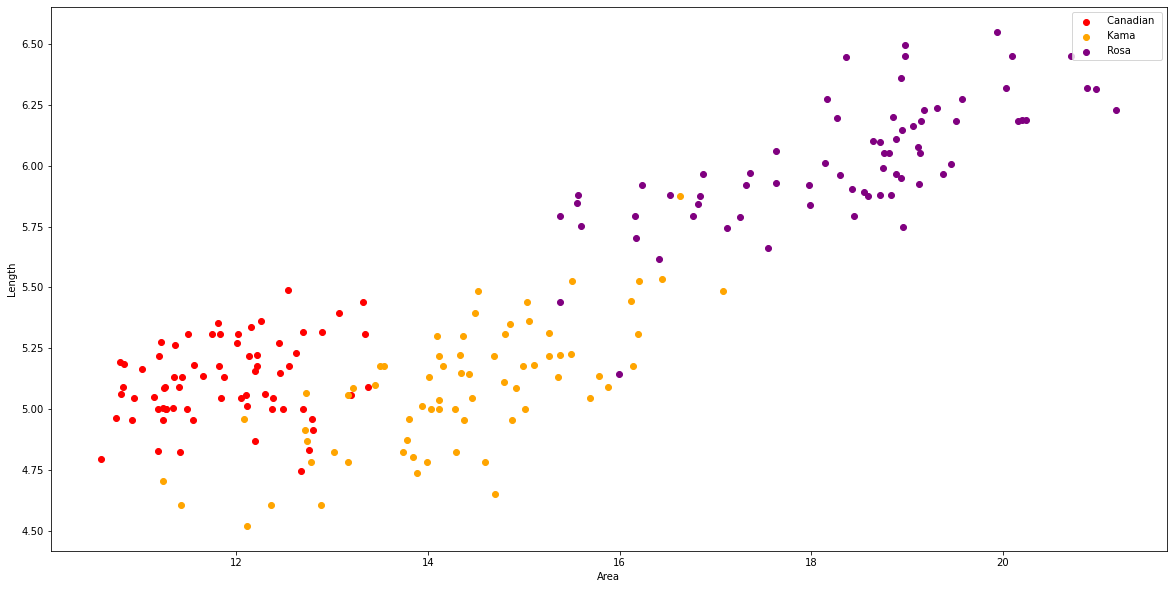

In [23]:
draw_plot()

plt.xlabel('Area')
plt.ylabel('Length')
plt.legend()
plt.show()

In [25]:
m = len(df)  # number of data

w = pd.Series([np.random.rand(),np.random.rand(),np.random.rand()]) 

echo = int(5e4)
learning_rate = 0.1

print(w)

0    0.756563
1    0.095887
2    0.870556
dtype: float64


In [26]:
# gradient
for iter in range(echo):
    temp = np.array([[1] * m, df.Area, df.Length])
    
    # dot product of w and temp
    # sigma(w0*1 + w1*x1 + w2*x2)
    w_dot = w.dot(temp)    
    
    # cost function
    h = np.array(sigmoid(w_dot))
    
    y = [1 if x == ' Kama ' else 0 for x in df.Wheat_Varieties]
    
    h -= y
    
    delta_w0 = learning_rate * sum(h)
    delta_w1 = learning_rate * h.dot(df.Area)
    delta_w2 = learning_rate * h.dot(df.Length)
    
    # update w0, w1, w2
    w[0] = w[0] - delta_w0 / m
    w[1] = w[1] - delta_w1 / m
    w[2] = w[2] - delta_w2 / m
    
print(w)

0    44.829404
1     1.577051
2   -13.184637
dtype: float64


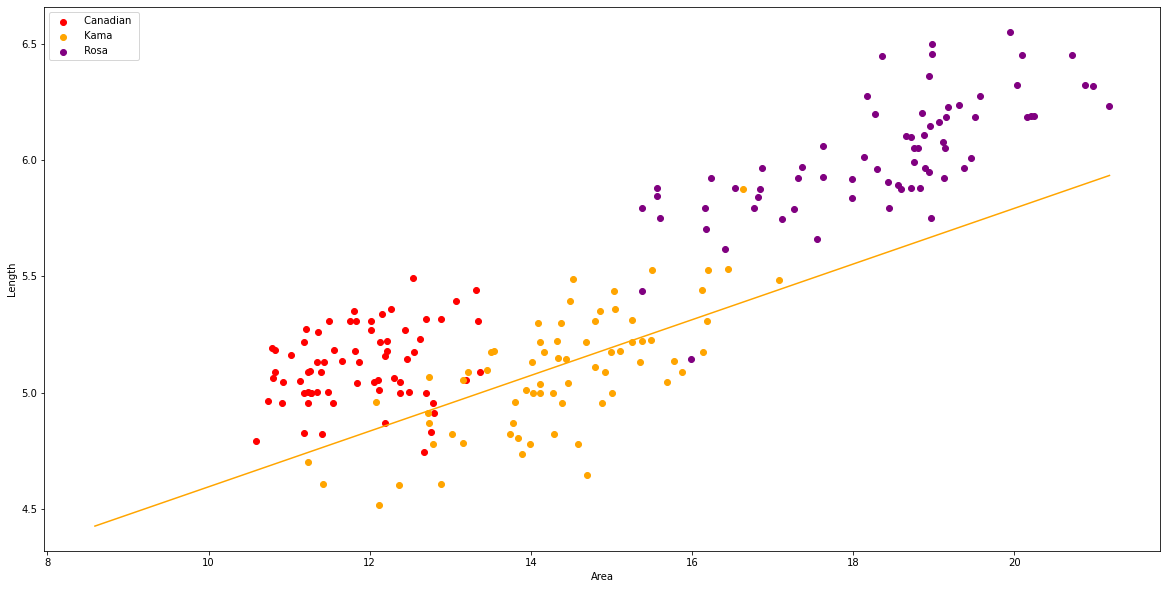

In [30]:
draw_plot()

x_range = np.linspace(min(df.Area) -2, max(df.Area))
y_range = -(w[0] + w[1]*x_range) / w[2]

plt.plot(x_range, y_range, color = 'orange')

plot_label()

---
### Multiple logistic regreesion lines
---

In [32]:
m = len(df)

w = []

for _ in range(3):
    w.append(pd.Series([np.random.rand(),np.random.rand(),np.random.rand()]))
  
print(w[0])
print(w[1])
print(w[2])

0    0.090529
1    0.988490
2    0.513223
dtype: float64
0    0.825332
1    0.763978
2    0.736586
dtype: float64
0    0.983578
1    0.474358
2    0.751972
dtype: float64


In [33]:
variety_name = [' Kama ', ' Rosa ', ' Canadian ']

# gradient
for y_idx in range(3):
    for _ in range(echo):
        w_dot = w[y_idx].dot(temp)
        h = np.array(sigmoid(w_dot))
        
        y = [1 if x == variety_name[y_idx] else 0 for x in df.Wheat_Varieties]
        
        h -= y
        
        delta_w0 = learning_rate * sum(h)
        delta_w1 = learning_rate * h.dot(df.Area)
        delta_w2 = learning_rate * h.dot(df.Length)
        
        w[y_idx][0] = w[y_idx][0] - delta_w0 / m
        w[y_idx][1] = w[y_idx][1] - delta_w1 / m
        w[y_idx][2] = w[y_idx][2] - delta_w2 / m
        
        
print(w[0])
print(w[1])
print(w[2])

0    44.822149
1     1.744303
2   -13.118050
dtype: float64
0   -30.423946
1     0.950383
2     2.709592
dtype: float64
0    1.927871
1   -3.499305
2    8.572099
dtype: float64


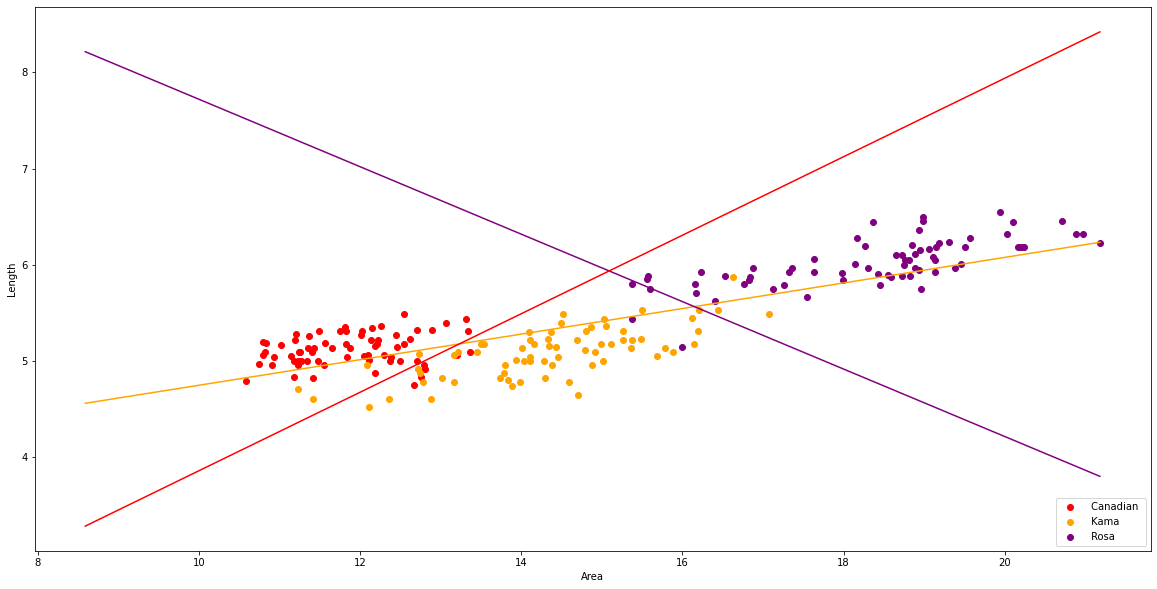

In [35]:
df = pd.DataFrame(data)
grouped = df.groupby("Wheat_Varieties")

plt.figure(figsize=(20,10))
wheat_color = {' Kama ' : 'orange', ' Rosa ' : 'purple', ' Canadian ' : 'red'}
line_color =  ['orange', 'purple', 'red']
    
 

for i in range(3):
    y_range = -(w[i][0] + w[i][1]*x_range) / w[i][2]
    plt.plot(x_range, y_range, color = line_color[i])
    
plot_label()